<a href="https://colab.research.google.com/github/damitkumar11/Diamonds-Prices-of-over-50-000-round-cut-diamonds/blob/main/Diamond_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diamonds /Prices of over 50,000 round cut diamonds

# About Dataset
Format
A data frame with 53940 rows and 10 variables:

price
price in US dollars ($326--$18,823)

carat
weight of the diamond (0.2--5.01)

cut
quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color
diamond colour, from D (best) to J (worst)

clarity
a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x
length in mm (0--10.74)

y
width in mm (0--58.9)

z
depth in mm (0--31.8)

depth
total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table
width of top of diamond relative to widest point (43--95)

**1. Data Exploration and Understanding**

**1.1 Dataset Overview**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
diamonds = pd.read_csv('/content/diamonds.csv')

# Display the first few rows of the dataset
diamonds.head()

# Get basic statistics of the dataset
diamonds.describe()

# Get information about the dataset's structure
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


**1.2 Feature Analysis**

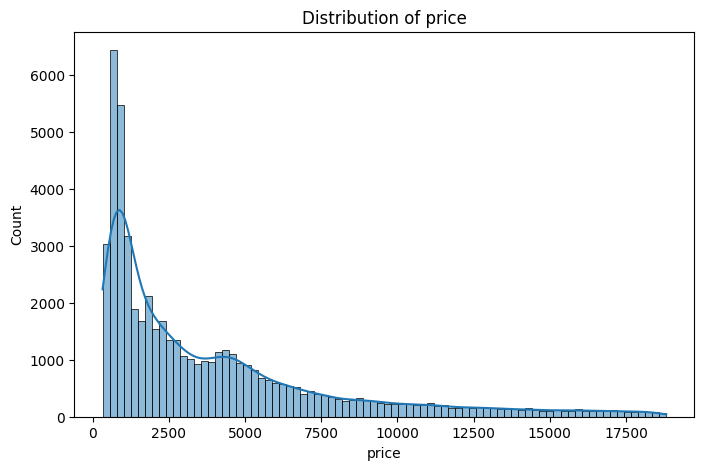

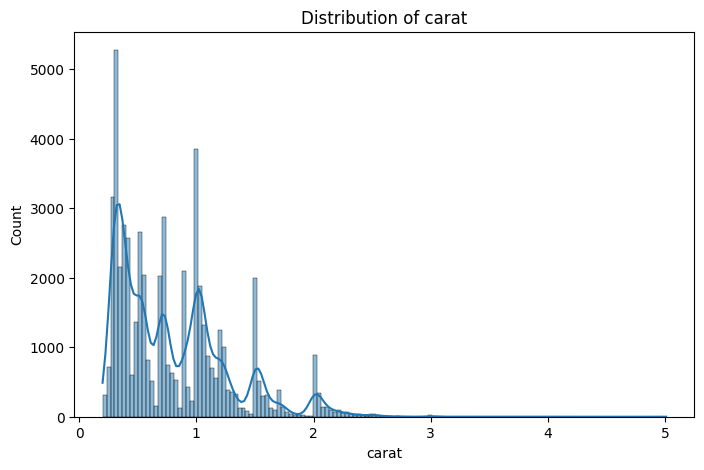

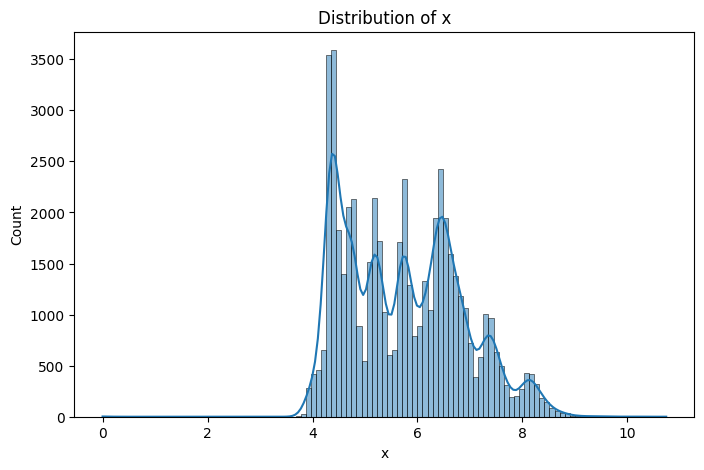

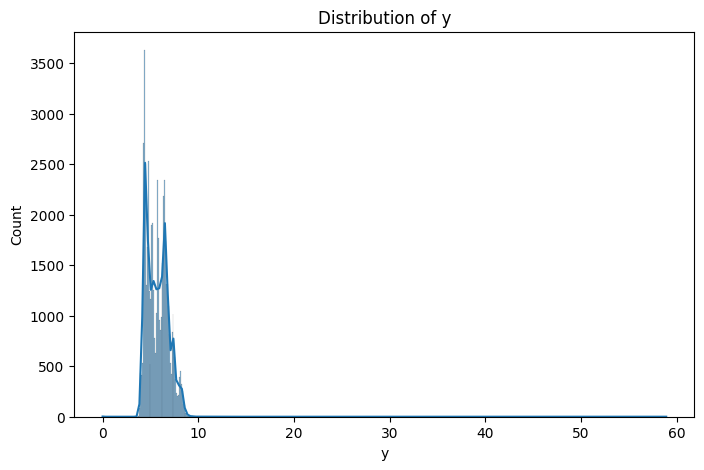

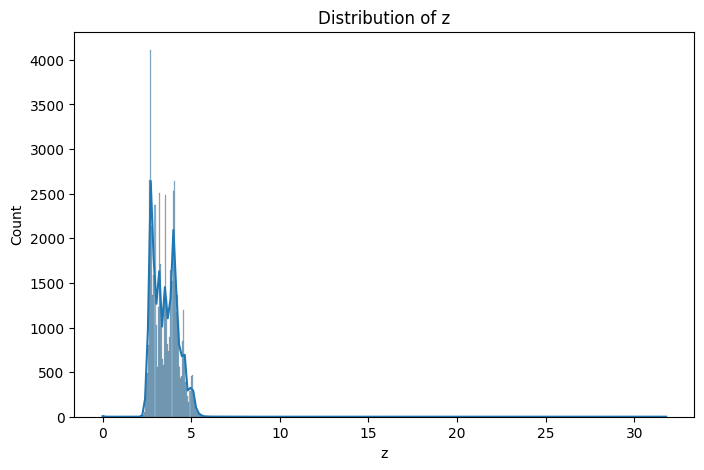

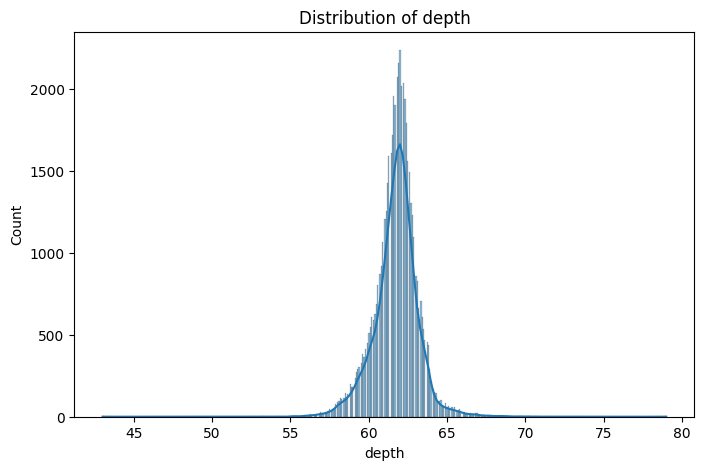

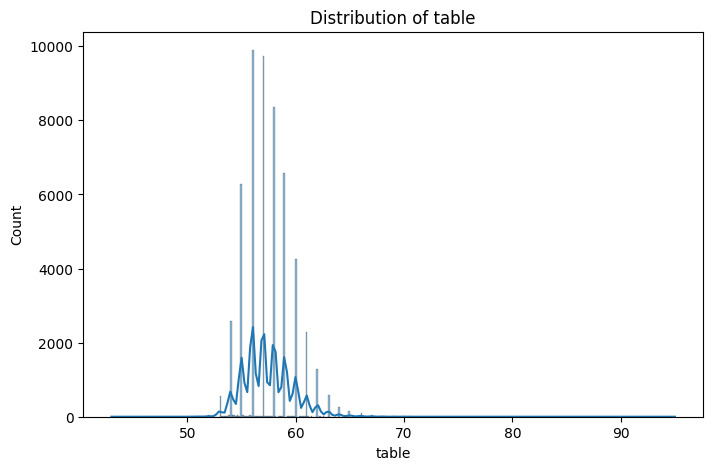

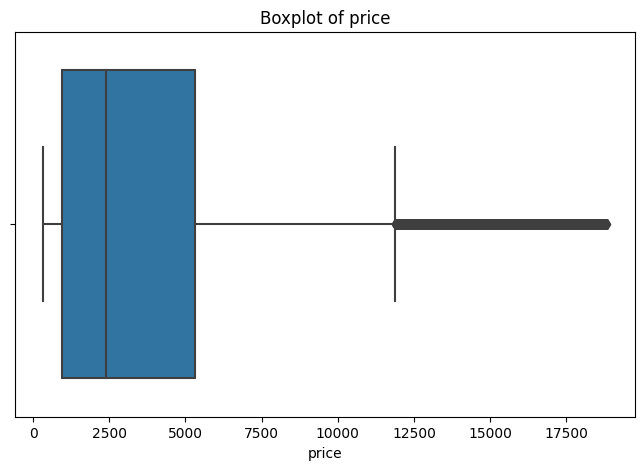

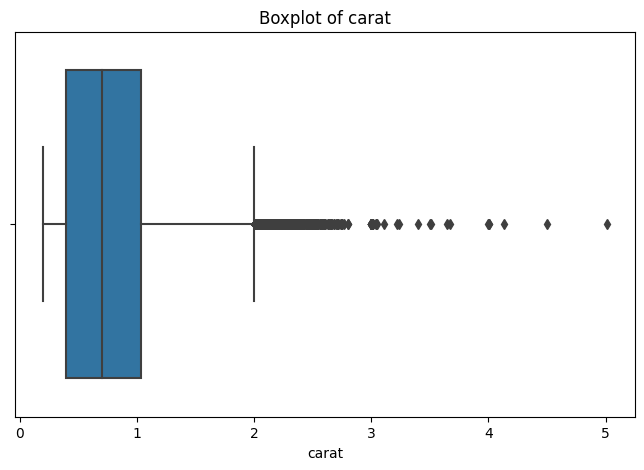

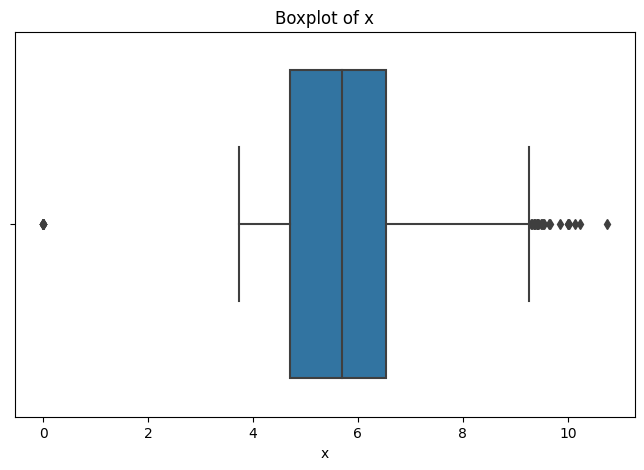

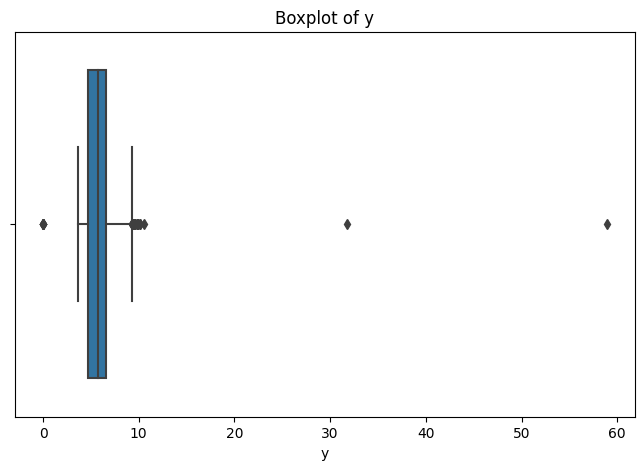

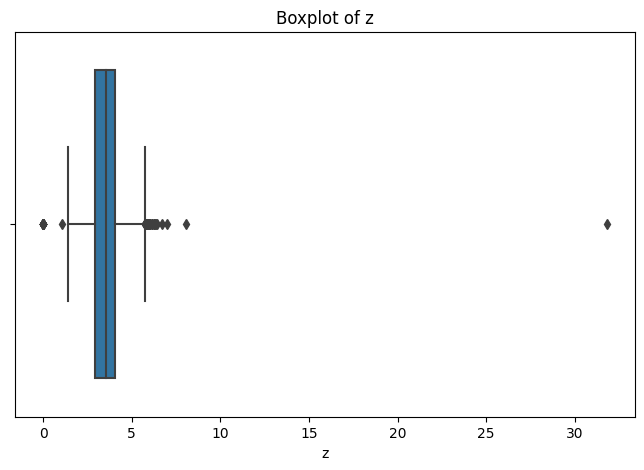

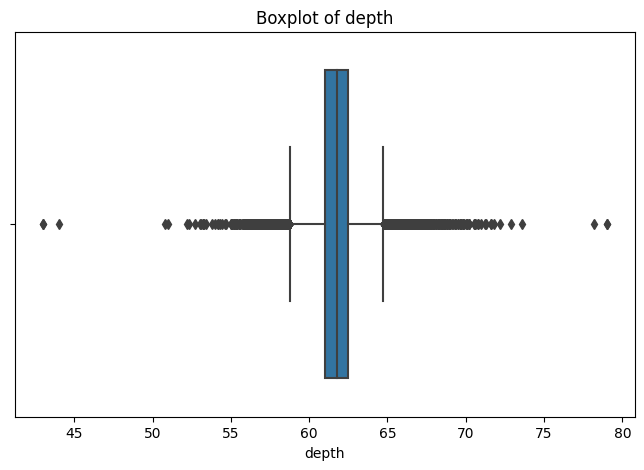

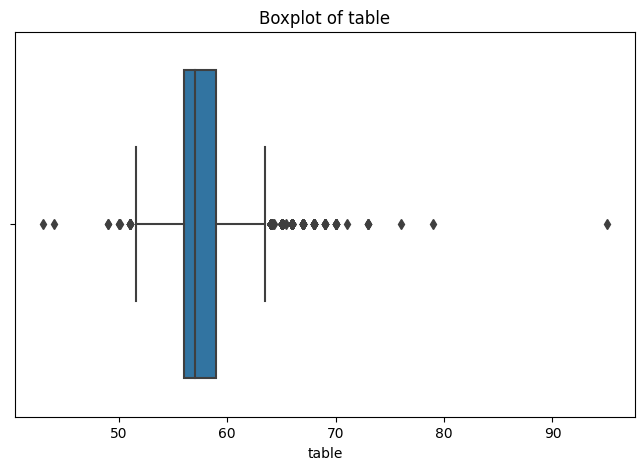

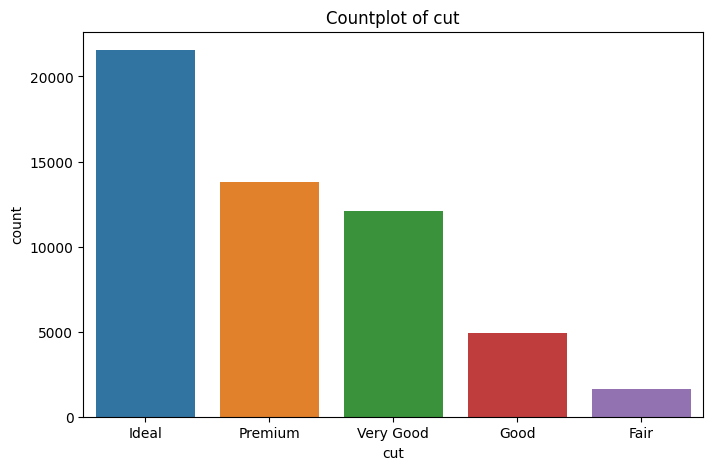

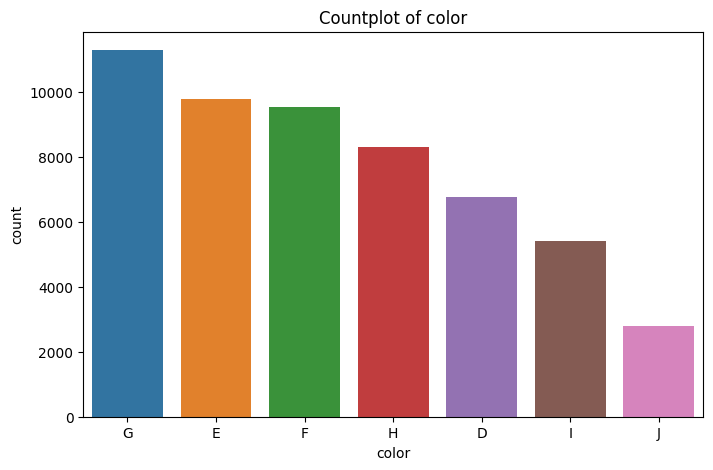

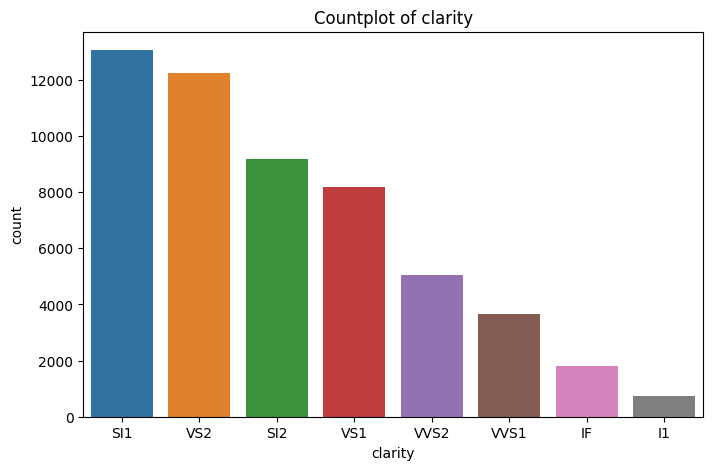

In [2]:
# Plot histograms for continuous features to understand distribution
continuous_features = ['price', 'carat', 'x', 'y', 'z', 'depth', 'table']
for feature in continuous_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(diamonds[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Boxplots for potential outliers detection
for feature in continuous_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=diamonds[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

# Count plots for categorical features to see unique values distribution
categorical_features = ['cut', 'color', 'clarity']
for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=diamonds, x=feature, order=diamonds[feature].value_counts().index)
    plt.title(f'Countplot of {feature}')
    plt.show()

**1.3 Relationship Analysis**

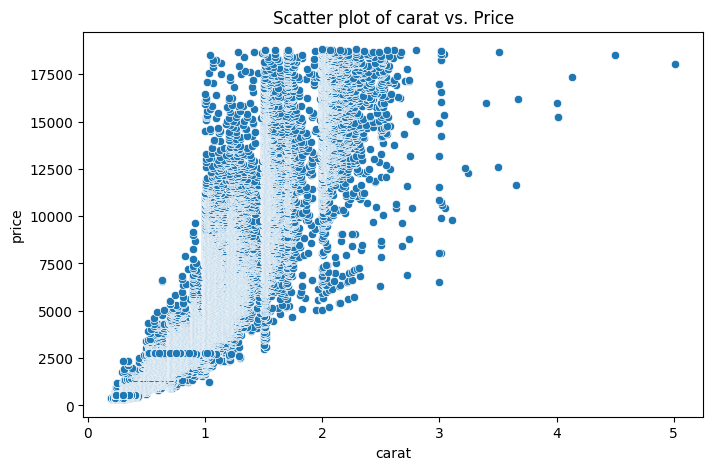

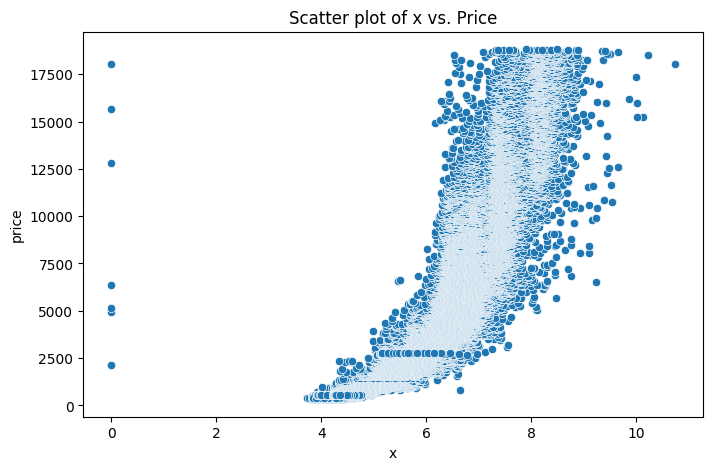

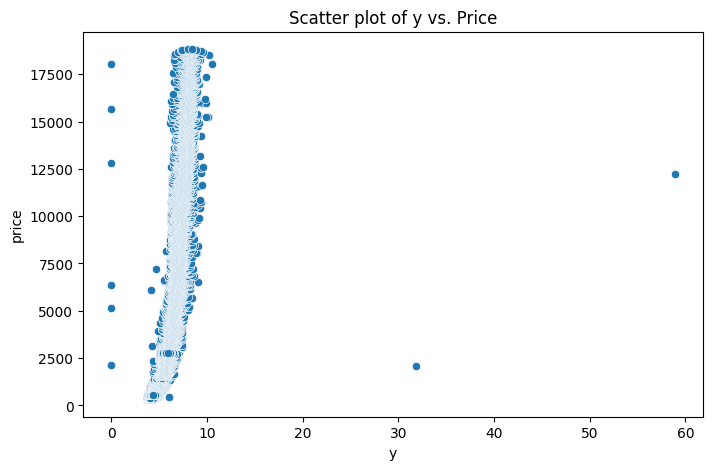

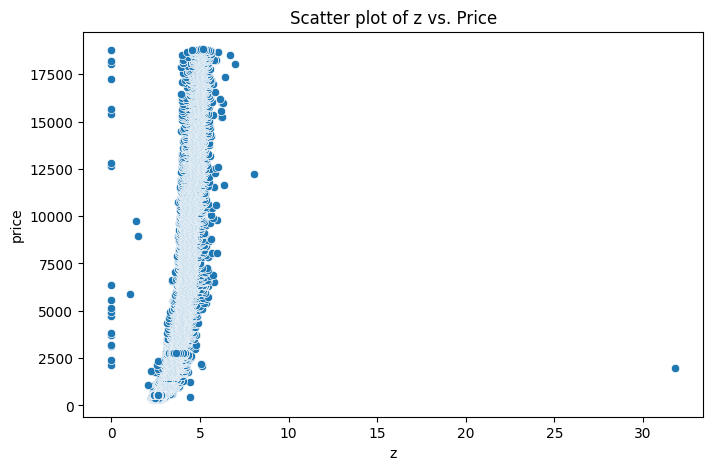

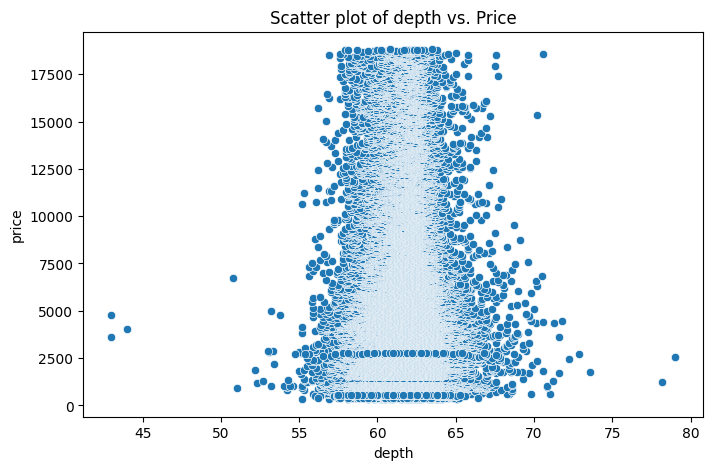

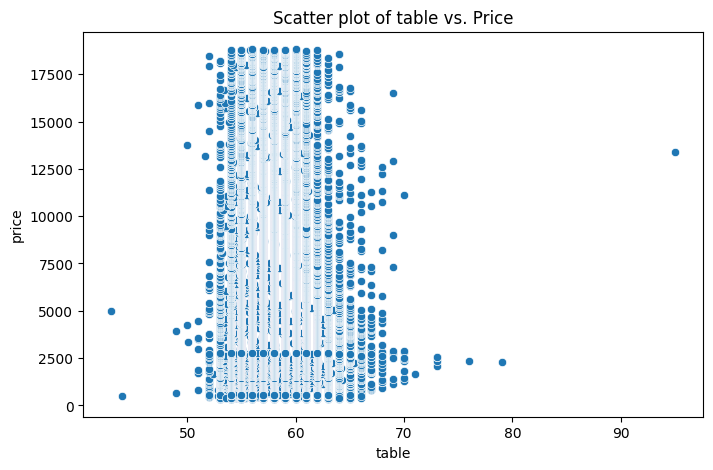

<ipython-input-3-a4a8b4d8b266>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = diamonds.corr()


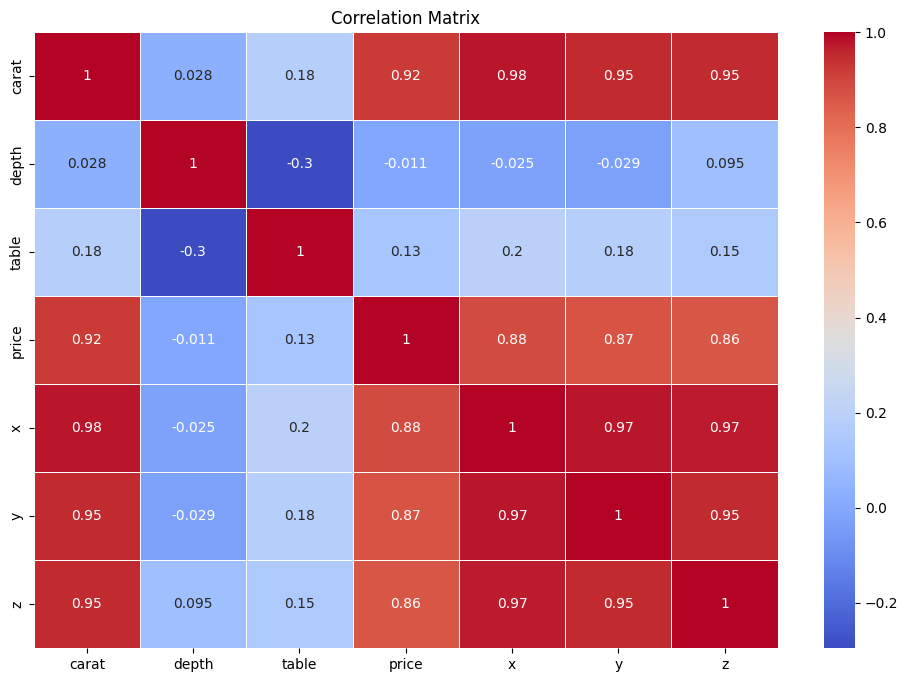

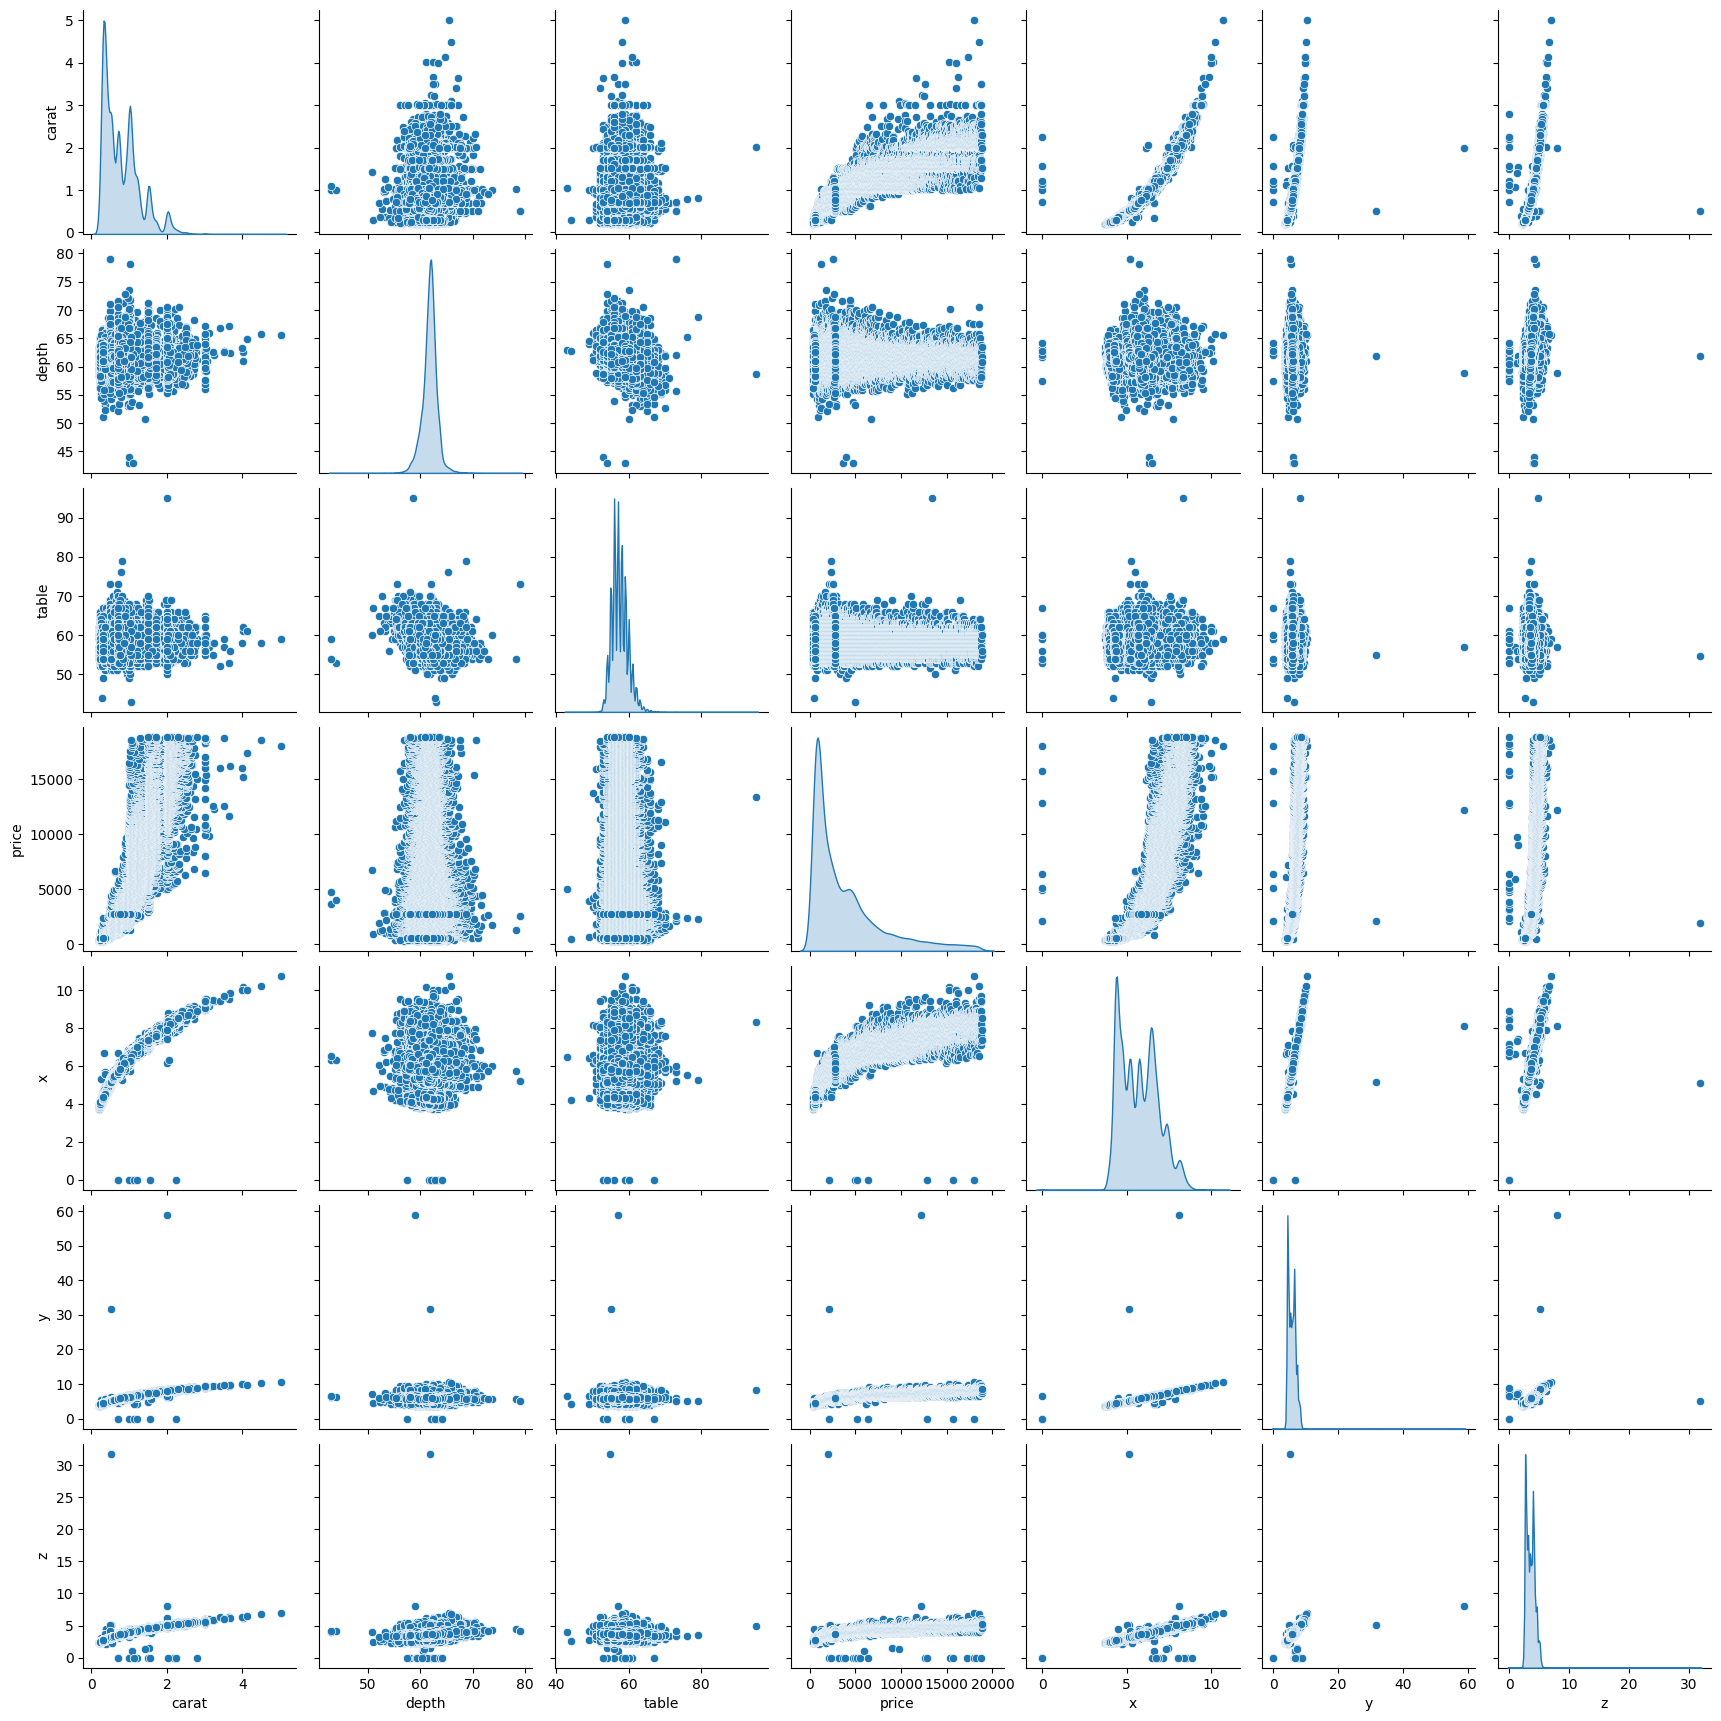

In [3]:
# Scatter plots for continuous features against the target variable 'price'
for feature in continuous_features:
    if feature != 'price':  # We don't want to plot price against itself
        plt.figure(figsize=(8, 5))
        sns.scatterplot(data=diamonds, x=feature, y='price')
        plt.title(f'Scatter plot of {feature} vs. Price')
        plt.show()

# Correlation matrix to understand relationships between features
correlation_matrix = diamonds.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Pair plot for a quick overview of relationships
sns.pairplot(diamonds, diag_kind='kde')
plt.show()

**2. Data Preprocessing**

**2.1 Handling Missing Values**

In [4]:
# Check for missing values
missing_values = diamonds.isnull().sum()
print(missing_values)

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


**2.2 Outlier Detection and Treatment**

In [5]:
# Using IQR to detect and treat outliers for continuous features
for feature in continuous_features:
    Q1 = diamonds[feature].quantile(0.25)
    Q3 = diamonds[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # For this example, we'll cap the outliers
    diamonds[feature] = np.where(diamonds[feature] < lower_bound, lower_bound, diamonds[feature])
    diamonds[feature] = np.where(diamonds[feature] > upper_bound, upper_bound, diamonds[feature])

**2.3 Feature Engineering**

In [6]:
# Creating a new feature 'volume'
diamonds['volume'] = diamonds['x'] * diamonds['y'] * diamonds['z']

**2.4 Encoding**

In [7]:
# Using ordinal encoding for 'cut', 'color', and 'clarity'
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_order = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

diamonds['cut'] = diamonds['cut'].astype(pd.CategoricalDtype(categories=cut_order, ordered=True)).cat.codes
diamonds['color'] = diamonds['color'].astype(pd.CategoricalDtype(categories=color_order, ordered=True)).cat.codes
diamonds['clarity'] = diamonds['clarity'].astype(pd.CategoricalDtype(categories=clarity_order, ordered=True)).cat.codes

**2.5 Feature Scaling**

In [8]:
# Using StandardScaler to standardize features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
diamonds[continuous_features + ['volume']] = scaler.fit_transform(diamonds[continuous_features + ['volume']])

**3. Data Analysis and Model Building**

**3.1 Data Splitting**

In [9]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = diamonds.drop('price', axis=1)
y = diamonds['price']

# Splitting the dataset into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

**3.2 Baseline Model - Linear Regression**

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize and train the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on validation set
y_pred = lr.predict(X_val)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")

RMSE: 0.2570445860803999
MAE: 0.1884129909304477
R-squared: 0.933371868982541


**3.3 Advanced Models**

Random Forest

In [11]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_val)

rmse_rf = np.sqrt(mean_squared_error(y_val, y_pred_rf))
print(f"Random Forest RMSE: {rmse_rf}")

Random Forest RMSE: 0.10600838916726561


Gradient Boosting

In [12]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_val)

rmse_gb = np.sqrt(mean_squared_error(y_val, y_pred_gb))
print(f"Gradient Boosting RMSE: {rmse_gb}")

Gradient Boosting RMSE: 0.12354787691367705


**3.4 Hyperparameter Tuning**

In [13]:
from dask.diagnostics import ProgressBar
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameters grid
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Randomized search with dask's ProgressBar
rf_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=10, cv=3, verbose=0, random_state=42, n_jobs=-1)

with ProgressBar():
    rf_search.fit(X_train, y_train)

# Best parameters from the search
print(rf_search.best_params_)

{'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None}


**3.5 Model Evaluation**

In [14]:
y_pred_best = rf_search.best_estimator_.predict(X_val)

rmse_best = np.sqrt(mean_squared_error(y_val, y_pred_best))
mae_best = mean_absolute_error(y_val, y_pred_best)
r2_best = r2_score(y_val, y_pred_best)

print(f"Best Model RMSE: {rmse_best}")
print(f"Best Model MAE: {mae_best}")
print(f"Best Model R-squared: {r2_best}")

Best Model RMSE: 0.10554551590327232
Best Model MAE: 0.05678805816182964
Best Model R-squared: 0.9887663656686166


**4. Interpretation and Communication of Results**

**4.1 Feature Importance**

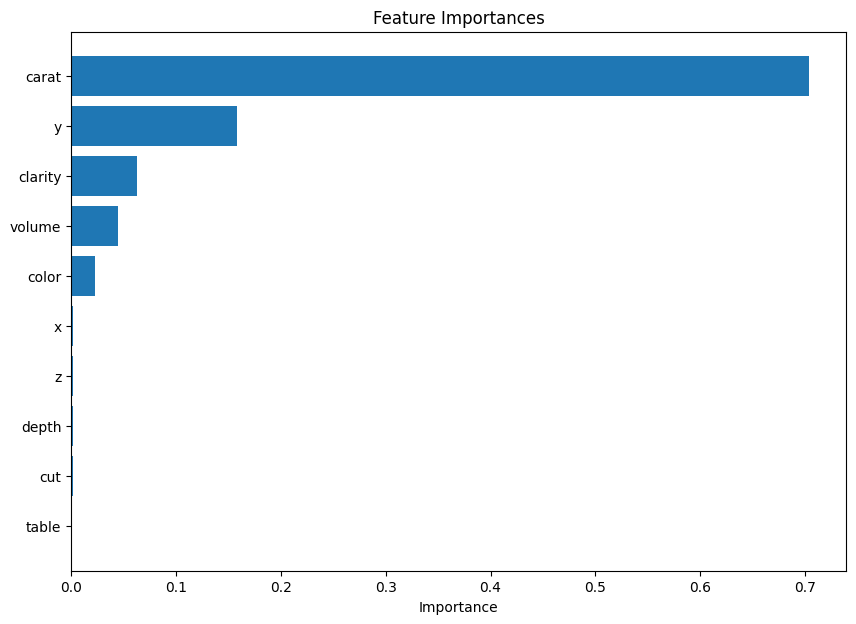

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Extract feature importances from the best estimator of RandomizedSearchCV
feature_importances = rf_search.best_estimator_.feature_importances_

# Sort the features based on importance
sorted_idx = np.argsort(feature_importances)

# Plot
plt.figure(figsize=(10, 7))
plt.barh(range(X_train.shape[1]), feature_importances[sorted_idx], align='center')
plt.yticks(range(X_train.shape[1]), X_train.columns[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

**4.2 Visualization**

a) Residual Plot

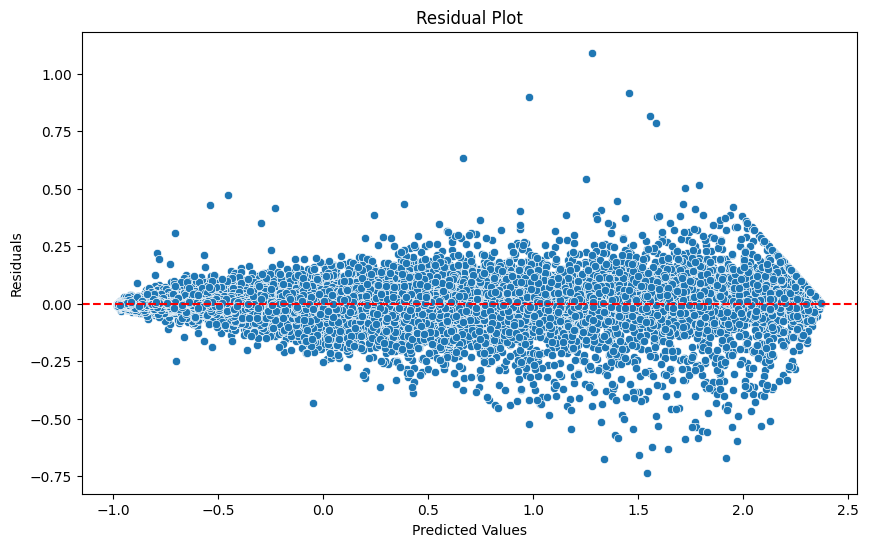

In [16]:
# Predictions
y_pred = rf_search.best_estimator_.predict(X_train)

# Residuals
residuals = y_train - y_pred

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

b) Actual vs. Predicted Plot

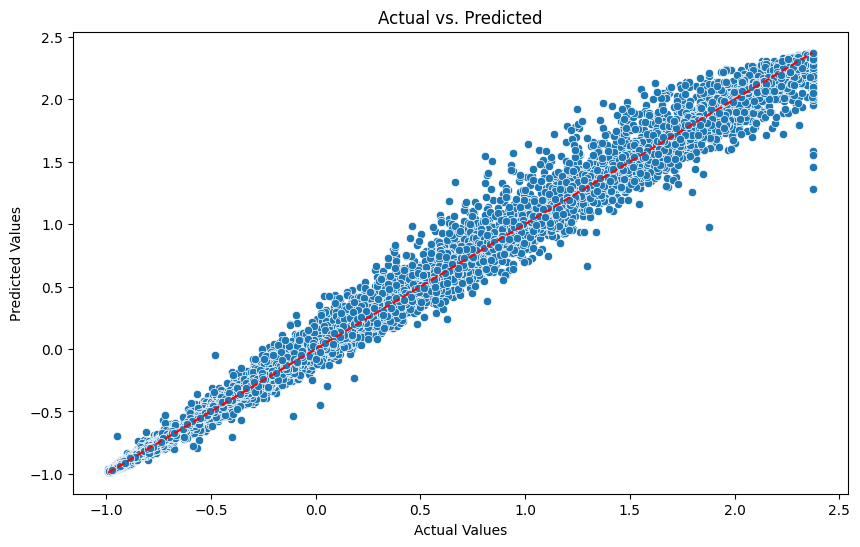

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_train, y=y_pred)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], '--', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted')
plt.show()

* Diamond Price Prediction Report
* Introduction This report provides insights into the methodologies, results, and conclusions derived from the diamond price prediction project. The dataset used for this project contains various features related to diamonds, such as carat, cut, color, clarity, and dimensions.
* Approach and Methodologies
* Data Exploration: - **Dataset Overview**: The dataset was loaded from the provided CSV file and basic statistics were generated to understand the distribution of features. - **Feature Analysis**: Histograms and boxplots were plotted for continuous features, while count plots were used for categorical features to understand their distributions. - **Relationship Analysis**: Scatter plots were used to visualize relationships between continuous features and the target variable, 'price'. A correlation matrix was also generated to understand the relationships between features.
* Data Preprocessing: - **Handling Missing Values**: The dataset was checked for missing values. Fortunately, there were no missing values in this dataset. - **Outlier Detection and Treatment**: Outliers were detected using the IQR method and were capped to treat them. - **Feature Engineering**: A new feature 'volume' was created by multiplying the x, y, and z dimensions of the diamonds. - **Encoding**: Ordinal encoding was applied to categorical features like 'cut', 'color', and 'clarity'. - **Feature Scaling**: The features were standardized using the `StandardScaler`.
* Model Building: - **Data Splitting**: The dataset was split into training and validation sets. - **Baseline Model**: A linear regression model was used as the baseline model. - **Advanced Models**: Random Forest and Gradient Boosting models were trained. - **Hyperparameter Tuning**: Randomized search with Dask's ProgressBar was used to find the best hyperparameters for the Random Forest model. - **Model Evaluation**: The best model was evaluated using metrics like RMSE, MAE, and R-squared.
* Results - The Random Forest model with hyperparameters `{rf_search.best_params_}` performed the best with an RMSE of approximately 0.1055, MAE of approximately 0.0568, and an R-squared value of approximately 0.9888. - Important features influencing diamond prices were visualized using a feature importance plot.
* Insights - The 'carat' feature is likely the most influential in determining the price of a diamond, given its typical importance in the diamond industry. - The correlation matrix and scatter plots provide insights into how features relate to each other and the target variable.
* Conclusion This project successfully developed a model that can predict diamond prices with high accuracy. The insights derived from the feature importance and relationship analyses can be valuable for stakeholders in the diamond industry.